In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# 1. Data Processing:

In [3]:
# loading the data
df = pd.read_excel("default of credit card clients.xls", index_col = 0)

In [8]:
df.shape

(30000, 24)

In [29]:
# removing the missing values
df.dropna(how='any', axis = 0, inplace=True)

In [14]:
df.shape

(30000, 24)

In [16]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [71]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [64]:
# Getting the frequency counts of "default payment next month" variable
df['default payment next month'].value_counts()


# this indicates that class 0 categorical variable is related to non-defaulter where as Class 1 is indicates defaulter

0    23364
1     6636
Name: default payment next month, dtype: int64

There are 23364 non-defaulters in the dataset and 6636 defaulters in the dataset.

In [17]:
df.describe(include= 'all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [4]:
# creating X and y objects

X = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']


In [19]:
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [5]:
# Splitting the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=43)

# 2. Random Forest Classifier - Base Model: 

In [6]:
base_model = RandomForestClassifier(random_state = 43)
base_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [7]:
# predicting the classes
y_base_preds_test = base_model.predict(X_test)

In [8]:
# calculating the predicted probabilities
y_base_probs_test = base_model.predict_proba(X_test)

In [9]:
# Calculating the confusion matrix and the classification report 
conf_matrix_base_test= metrics.confusion_matrix(y_test, y_base_preds_test)
clf_report_base_test = metrics.classification_report(y_test, y_base_preds_test)

In [12]:
# printing the confusion matrix
print(conf_matrix_base_test)

[[6607  374]
 [1379  640]]


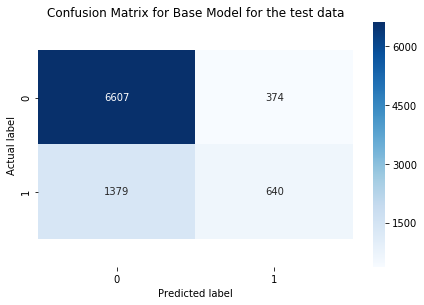

In [11]:
# Creating a heatmap for the test data
sns.heatmap(conf_matrix_base_test, annot=True, cmap="Blues" ,fmt='')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model for the test data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


b, t = plt.ylim() # discover the values for bottom and top
b += 0.8 # Add 0.8 to the bottom
t -= 0.8 # Subtract 0.8 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [13]:
# Printing classification report for the test data
print(clf_report_base_test)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6981
           1       0.63      0.32      0.42      2019

    accuracy                           0.81      9000
   macro avg       0.73      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [14]:
# Calculate roc_auc_score for the test data
roc_auc_base_test = metrics.roc_auc_score(y_test, y_base_probs_test[:,1])
print(roc_auc_base_test)

0.7304219356026075


In [15]:
# predicting the classes on the train data
y_base_preds_train = base_model.predict(X_train)

In [16]:
# calculating the predicted probabilities for the train data
y_base_probs_train = base_model.predict_proba(X_train)

In [17]:
# Calculating the confusion matrix and the classification report for the train data
conf_matrix_base_train= metrics.confusion_matrix(y_train, y_base_preds_train)
clf_report_base_train = metrics.classification_report(y_train, y_base_preds_train)

In [18]:
# printing the confusion matrix for the train data
print(conf_matrix_base_train)

[[16365    18]
 [  402  4215]]


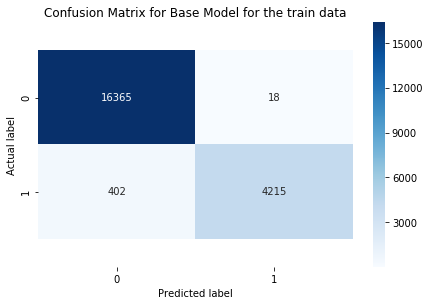

In [19]:
# Creating a heatmap for the train data
sns.heatmap(conf_matrix_base_train, annot=True, cmap="Blues" ,fmt='')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model for the train data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


b, t = plt.ylim() # discover the values for bottom and top
b += 0.8 # Add 0.8 to the bottom
t -= 0.8 # Subtract 0.8 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [20]:
# Printing classification report for the train data
print(clf_report_base_train)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16383
           1       1.00      0.91      0.95      4617

    accuracy                           0.98     21000
   macro avg       0.99      0.96      0.97     21000
weighted avg       0.98      0.98      0.98     21000



In [22]:
# Calculate roc_auc_score for the train data
roc_auc_base_train = metrics.roc_auc_score(y_train, y_base_probs_train[:,1])
print(roc_auc_base_train)

0.9991132836563826


There are very clear signs of overfitting in the training data since the accuracy and roc_auc_score of the train data are 0.98 and 0.99 respectively which is significantly higher when compared to the test data 0.81( accuracy) and 0.73 (ROC score). 

It looks like our base model random forest classfier has memorized our training data extremly well including the noise.
The classification reports of the train data indicates close to perfect classification, with 98% in precision, 100% perfect recall and 99% f1-score. 

Taking all these indicators into consideration we can clearly predict that the model is not going to accurately predict the observations when this base model random forest classifier is exposed to new data as this model is overfit and needs to be regularized.

# 3. Random Forest Classifier - Grid Search: 

In [23]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_features': [2, 4, "sqrt"],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split':[3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3],
    'random_state':[0]
}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [24]:
# Fitting the grid search random forest model on the train data
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 50.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [25]:
# Best params
best_params = rf_Grid.best_params_
best_params

{'max_depth': 12,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 500,
 'random_state': 0}

In [26]:
# Identifying the best model from the grid search CV
best_model = rf_Grid.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
# Predicting classes using best model on the test data
y_pred_grid_test = best_model.predict(X_test)
# Calculating the predicted probabilities for the test data
y_probs_grid_test = best_model.predict_proba(X_test)

In [28]:
# Generating the confusion matrix and classification report for test data
conf_matrix_grid_test = metrics.confusion_matrix(y_test, y_pred_grid_test)
clf_report_grid_test = metrics.classification_report(y_test, y_pred_grid_test)

In [29]:
# printing the confusion matrix for the test data of the grid search model
print(conf_matrix_grid_test)

[[6702  279]
 [1418  601]]


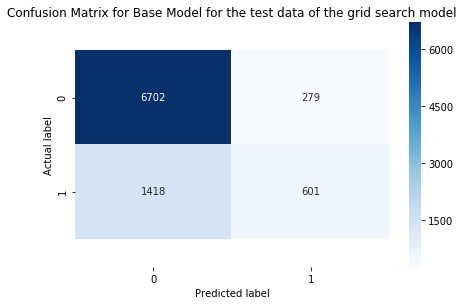

In [30]:
# Creating a heatmap for the test data for grid search model
sns.heatmap(conf_matrix_grid_test, annot=True, cmap="Blues" ,fmt='')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model for the test data of the grid search model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


b, t = plt.ylim() # discover the values for bottom and top
b += 0.8 # Add 0.8 to the bottom
t -= 0.8 # Subtract 0.8 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [31]:
# Printing classification report for the test data of the grid search model
print(clf_report_grid_test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6981
           1       0.68      0.30      0.41      2019

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [32]:
# Calculate roc_auc_score for the test data of the grid search model
roc_auc_grid_search = metrics.roc_auc_score(y_test, y_probs_grid_test[:,1])
print(roc_auc_grid_search)

0.7778594045580025


In [33]:
# Predicting classes using best model on the train data
y_pred_grid_train = best_model.predict(X_train)
# Calculating the predicted probabilities for the train data
y_probs_grid_train = best_model.predict_proba(X_train)

In [34]:
# Generating the confusion matrix and classification report for train data
conf_matrix_grid_train = metrics.confusion_matrix(y_train, y_pred_grid_train)
clf_report_grid_train = metrics.classification_report(y_train, y_pred_grid_train)

In [35]:
# printing the confusion matrix for the train data of the grid search model
print(conf_matrix_grid_train)

[[16112   271]
 [ 2639  1978]]


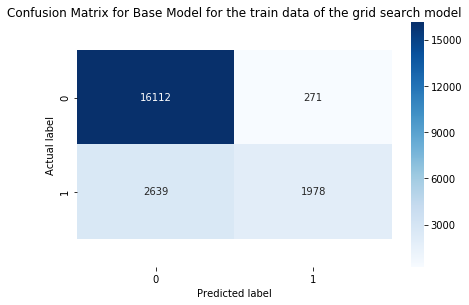

In [36]:
# Creating a heatmap for the train data for grid search model
sns.heatmap(conf_matrix_grid_train, annot=True, cmap="Blues" ,fmt='')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model for the train data of the grid search model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


b, t = plt.ylim() # discover the values for bottom and top
b += 0.8 # Add 0.8 to the bottom
t -= 0.8 # Subtract 0.8 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [37]:
# Printing classification report for the train data of the grid search model
print(clf_report_grid_train)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16383
           1       0.88      0.43      0.58      4617

    accuracy                           0.86     21000
   macro avg       0.87      0.71      0.75     21000
weighted avg       0.86      0.86      0.84     21000



In [38]:
# Calculate roc_auc_score for the train data of the grid search model
roc_auc_grid_train = metrics.roc_auc_score(y_train, y_probs_grid_train[:,1])
print(roc_auc_grid_train)

0.8897666615886864


There are again obvious signs of overfitting as the accuracy of the test data is 0.81 and that of the train data is 0.88 for the grid search best model where as the roc_auc_score of the test data is around 0.88 compared to 0.77 of the train data (0.889) . 

Taking a look at the classification reports of the train data we observe that the classification metrics of precision , recall and f1 score are significantly higher compared to that of the test data for the gri search best model.

These signs indicate that the grid search CV best model has incorporated and learned too much variance when it comes to the train data including the underlying noise which is dangerous because when this overfit model is exposed to new data , it will fail to perform accurate predictions.

However this grid search best model random forest classifier is not as overfit when compared to the SKlearn base model of random forest classifier.

# 4. Create a feature importance plot for your best performing model.

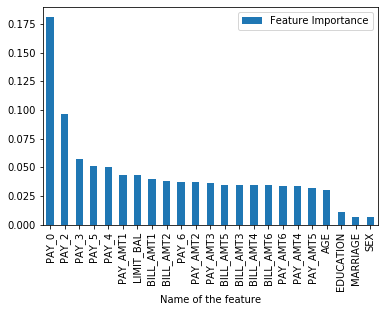

In [39]:
# Feature importance plot
feature_imp = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': best_model.feature_importances_})
feature_imp.sort_values('Feature Importance', ascending=False, inplace=True)
feature_imp.plot.bar(x='Name of the feature', y='Feature Importance')

In [55]:
# Feature importance 
feature_importance = pd.DataFrame({'feature':X_train.columns,'importance':best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance',ascending=False).set_index('feature')
feature_importance.head(5)

,importance
feature,
PAY_0,0.180619
PAY_2,0.096309
PAY_3,0.056747
PAY_5,0.051407
PAY_4,0.050183


It is very interesting to note that not a single demographic variable made it to the top 5 of the feature importance variables.
PAY_0 variable indicates whether the first bill was paid or not.As the first bill matters very much and give us extremely good insights in predicting the subsequent payments or defaults.

# 5. Conceptual Questions: 

a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why.


In [44]:
# Best parameters for the grid search 
rf_Grid.best_params_

{'max_depth': 12,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 500,
 'random_state': 0}

In [49]:
# The Classification report of the base model i.e the Model # 2 on the TEST data

print(clf_report_base_test)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6981
           1       0.63      0.32      0.42      2019

    accuracy                           0.81      9000
   macro avg       0.73      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [50]:
# The Classification report of the grid search best(param) model i.e the Model # 3 on the TEST data

print(clf_report_grid_test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6981
           1       0.68      0.30      0.41      2019

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [51]:
# ROC_AUC score of the base model i.e the Model # 2 on the TEST data
roc_auc_base_test

0.7304219356026075

In [53]:
# ROC_AUC score of the grid search best(param) model i.e the Model # 3 on the TEST data
roc_auc_grid_search

0.7778594045580025

Our observations indicate that the grid search best model i.e Model 3 outperforms the sklearn base model i.e model 2 very significantly by a huge margin in terms of ROC_AUC score . 
Accuracy for both the models is exactly the same.
Additionally the model #3 outperforms model #2 slightly in terms of recall and F1 score for class 0 .
But for class 1 , we see that model #2 slightly outperforms model #3 in terms of recall and F1 score.
However for the Class 1 predictions , we observe that model #3 slightly outperforms model #2 in terms of precision for the class 1 by a huge margin.  

We care more about the precision of the class 1 observations in order to successfully and accurately predict the defaulters in the next week . So taking that into consideration , we declare that model #3 is definitely a better model than model #2 in predicting the defaulters.







b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case. 


The difference of the ROC_AUC score between the train and test data for the base model i.e model #2 is 0.2687 which is much high when compared to that of the model #3 which is 0.1119 . ROC_AUC score for the train data of the model #3 much is smaller compared to model 2 indicating that model 2 is way more overfit than model 3 and is not able to generalize on data and may not accurately predict when exposed to new data.

In [66]:
# Creating a comparison table for camparing the ROC_AUC scores for the train and test data between model 2 and model 3
    
compare_df = pd.DataFrame({'Model number' : [2,3],
                          'ROC_AUC score TEST data' : [roc_auc_base_test,roc_auc_grid_search],
                          'ROC_AUC score TRAIN data' : [roc_auc_base_train,roc_auc_grid_train],
                           'difference TEST'
                          })
compare_df

,Model number,ROC_AUC score TEST data,ROC_AUC score TRAIN data
0,2,0.730422,0.999113
1,3,0.777859,0.889767


In [68]:
# parameters from the base model
base_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)>

Our base model or model #2 is a very basic and complex as indicated by the default parameters that it has incorporated. This base model has no limits placed on it for the hyperparameter "max_depth" which causes each individual decision tree with the random forest model to expand exponentially leading upto a point where each decision tree has exactly one sample or observation in each node increasing the complexity of the model to the fullest. The "min_samples_leaf" hyperparameter which is set to 1 makes sure that the tree will stop splitting if the minimum number of samples at any leaf node is 1. The "min_samples_split" hyperparameter which is deafult set to 2 means that it takes only 2 samples within any internal node for the split to occur . These default values that have been set for the above mentioned hyperparameters leads to the development of deeper level trees in model 2 compared to model 3 which has specific optimal values been set for these hyperparameters. So the base model or the model 2 has only pure nodes with zero gini impurity index and contains only 1 sample. The level of flexibility that has been adopted by model by setting default of null values been set to their important hyperparameters leads to high complexity and overfitting. That is the reason we see that our model 2 is highly overfit based on our classification metrics.

It is very important to note that the value of the hyperparameter "n_estimators" is set to 100 for the model 2 where as for the model 3 grid search best model , the value for "n_estimators" is set to 500 which means that the mdoel 2 build 100 trees in comparison to model 3 that builds 500 trees. Model 3 is capable of building trees that are uncorrelated and it can efficiently average out the error bias in a better way and can further help in reducing variance.


If we perform hyperparamter tuning in an efficient way, then it definitely helps in reducing the overfitting or high variance problem.We applied grid search approach to the random forest classifier in model 3 in order to perform exhaustive experimentation and search to come up with the best combinations of hyperparameter values. The k-fold cross validation strategy hunts down the combination of hyperparameters that leads to the highest ROC_AUC score and other classification metrics. The performance of model 3 random forest  was still limited despite using the grid search approach because we specified certain paramters or values in the "param_grid" and thats the reason, the model 3 failed to totally get rid of the overfitting issue.








c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 



Gini index or the gini impurity determines the probabability of a particular feature that can be labelled incorrectly when its chosen randomly within the samples. It measures the impurity or degree of dilution in a set of data. The Gini index is calculated at each node within the random forest or decision tree classification.
A node with 0 gini index value is called a pure node i.e it contains data from a single class.

During the classification process , gini index is calculated for each node starting from the root node and a split is performed at any node that leads to a greater reduction in its gini impurity value. The splitting process is performed recursively until all the nodes are totally pure nodes with 0 gini index values or if the max depth of the decision tree is reached. No observation from a pure node can be misclassified and this is the strategy that random forest follows in order to improve the performance or accuracy of the model and also to make the nodes purer.






d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

Both Random forest and bagging are ensemble models . the main difference between them is that bagging combines different individual models like SVM, logistic regression, KNN etc where as the ramdom forest is homogeneous in the sense that it combines only multiple individual decision trees to perform the final prediction of each observation.
Random forest reduce the correlation between the individual trees thereby reducing the overall variance of the model where as bagging by the majority selection of final outcomes from multiple individual trees.

One of the main contrasting differences between the random forest and the bagging models is that all the features are selected for splitting any particular node in the bagging models where as in the random forest only a subset of features are selected at random out of all the features and the best split feature is chosen in order to split any particular node within the individual decision trees in the random forest model.

It has to be noted that both the random forest and bagging model adopt the bootstrapping approach which involves random samples with replacements within the training sample distribution but random forest goes one step ahead and randomly splits upon random subset of features not just on the observations.

Random forest considers only a few top level predictors out of all the predictors and creates various bootstrapped samples by uniformly drawing random samples with their respective replacements. This is done in order to average out the variance thereby reducing it overall. Now during the ramdom forest classification process, only these strong top level predictors are chosen at the top level and perform the split on random subset of features rather than all the features as opposed to bagging algorithm that splits on all the features .

Because of this , the random forest has decorrelated individual decision trees because it splits on random subset of features or different dimensions and therefore the decision trees are more independent of other trees compared to bagging.That is the reason when the aggregation or ensemble of all the trees is performed , it leads to more accurate predictions with low variance compared to the bagging models with very low variance.







e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

Max depth is a very important hyperparameter that is used for tuning in order to improve the performance of the random forest models. Max_depth parameters determines how deep any individual decsion tree within the random forest can go in terms of length and complexity. Deeper the tree, more complex it is involving more number of splits on its nodes thereby capturing more information on the training data.

Setting the max_depth parameter to "none" causes the expansion of the nodes within the random forest model by splitting them until all the nodes are pure with null gini index impurity containing even less observations or samples in each node than the "min_samples_split" hyperparmeter that is required to split an internal node.

If in case we choose not to limit this "max_depth" parameter , then each individual decision tree with the random forest model has unlimited amount of flexibility which causes each tree to grow until it reaches a point where it has exactly one sample or one observation residing within each leaf node thereby leading to perfect classification of all the training data. In this particular scenario , while it leads to having reduced bias with the model, parallelly the model also learns the unnecessary noise within the training data rather than learning actual relationships between different features within the data without generalizing upon it and leads to overfitting issue . This makes the model suffer from high variance as it cannot make inferences on any other data.
In simple words ,the model becomes extremely complex which might also decrease the variance to a great extent but there is a good chance that it might also lead to massive overfitting. So "None" max_depth leads to high variance and overfitting.

If the max_depth parameter is constrained(very low value) or limited , then it may not able to capture detailed patterns within the training data thereby leading to increase in bias or undefitting and the random forest model has poor predictive ability.

Therefore it is very important to limit the max_depth hyperparameter or in other words perform pruning of the decision trees so that we can find optimal balance between variance and bias giving rise to a highly efficient and high performance model.









f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

In K-Folds Cross Validation involves first splitting the original data into train/test datasets and then split the training data into 'k' subsets or folds.Then we remove the very first selected subset and train our model using training data on 'k-1'subset of data thereby totally deserting or leaving the 1st subset out of our training data so that we can treat it as test data(not the actual test data) and expose our model to it once its trained.
During the k-fold process , we iteratively fit the model k number of times , while training our data on k-1 folds.
K-th fold data is treated as the validation set.
At the end we calculate the average of our model results against each one of the subsets or folds and then finalize our model. Thereafter we can apply our trained model to the original test dataset.


lets say we are fitting our model with K = 10 i.e 10-fold validation. In our first iteration, we shall be training our data on the first 9 folds and evaluate on the 10th fold of data as it is treated as a validation set. In the second iteration, we will be training our data on the 1st, 2nd, 3rd,4th and 10th fold minus the 9th fold and the evaluate the model on the 9th subset. This entire process is repeated 10 times altogether and every time we evaluate our model on a fold that is different from the previous one. In the end , we do an average of the overall performance of the model on each fold to calculate final validation metrics for the model.



K-fold cross validation leads to much better evaluation of our random forest model during the grid search process. Train-test split strategy involves testing the model only on the single test dataset where as k-fold cross validation iteratively trains and performs testing process 'k' number of times making sure that our model experiences variation or changes in the distribution of the training and validation datasets. This massively reduces the variance and error bias caused by variation between the train and test datasets. Therefore the k-fold validated models have a higher predictive power compared to non-cross validated models that have a huge error bias and also better estimates the performance on newly exposed unseen data.





